In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
data = pd.read_csv("/kaggle/input/myntra-products-dataset/myntra202305041052.csv")

In [3]:
data.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [4]:
data.isna().sum()

id             0
name           0
img            0
asin           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
purl           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [6]:
data.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

Based on above information features "img","asin","purl" are not that useful for us so I am going to drop it.

In [7]:
data.drop(["img","asin","purl"],axis = 1, inplace = True)

In [8]:
data.columns

Index(['id', 'name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount',
       'seller'],
      dtype='object')

Check for duplicates in the data

In [10]:
print("The number of duplicated values are: ",data.duplicated().sum())

The number of duplicated values are:  0


In [12]:
data["TotalDiscount"] = data["mrp"]-data["price"]

In [13]:
data.head()

,id,name,price,mrp,rating,ratingTotal,discount,seller,TotalDiscount
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,767.0
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,225.0
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,648.0
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,803.0
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,405.0


In [28]:
data["discountin%"] = (data["TotalDiscount"]/data["mrp"])*100

In [31]:
data["discountin%"]=data["discountin%"].astype(int)

In [32]:
data.head()

,id,name,price,mrp,rating,ratingTotal,discount,seller,TotalDiscount,discountin%
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,767.0,59
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,225.0,45
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,648.0,54
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,803.0,73
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,405.0,45


In [33]:
data.drop("discount",inplace=True,axis = 1)

# Exploratory data analysis

In [36]:
# plot a graph between mrp  and total discount
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff

/tmp/ipykernel_33/1989132912.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='mrp', ylabel='Density'>

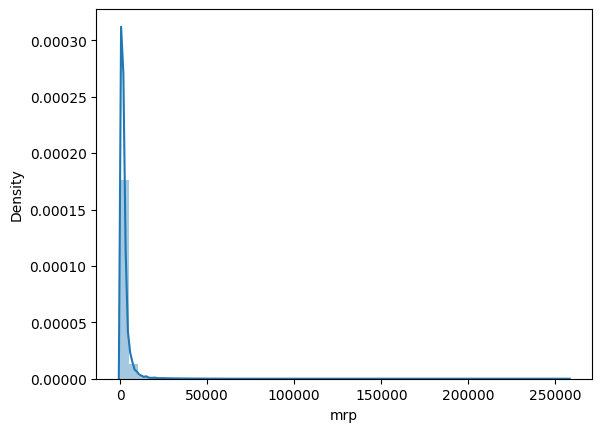

In [52]:
import seaborn as sns
sns.distplot(data["mrp"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='rating', ylabel='Count'>

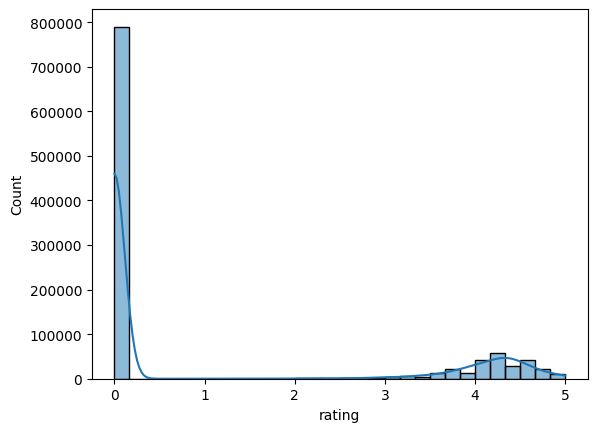

In [62]:
sns.histplot(data["rating"],bins = 30,kde = True)

In [55]:
ratingdata = data["rating"]>0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



<Axes: xlabel='rating', ylabel='Count'>

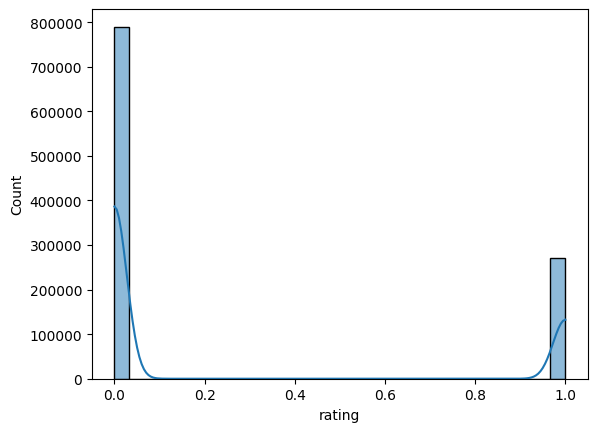

In [63]:
sns.histplot(ratingdata,bins = 30,kde = True)